In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import helper_functions as hf
import pyarrow.parquet as pq

In [4]:
data = hf.load_data('hv_fhv_data/fhvhv_tripdata_2024-')

In [5]:
data.head()

hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0003               B03404               B03404   
3            HV0003               B03404               B03404   
4            HV0003               B03404               B03404   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2024-01-01 00:21:47 2024-01-01 00:25:06 2024-01-01 00:28:08   
1 2024-01-01 00:10:56 2024-01-01 00:11:08 2024-01-01 00:12:53   
2 2024-01-01 00:20:04 2024-01-01 00:21:51 2024-01-01 00:23:05   
3 2024-01-01 00:35:46 2024-01-01 00:39:59 2024-01-01 00:41:04   
4 2024-01-01 00:48:19 2024-01-01 00:56:23 2024-01-01 00:57:21   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2024-01-01 01:05:39           161           158        2.83  ...       4.05   
1 2024-01-01 00:20:05           137            79        1.57  ...       0.89   
2 2024-01-01 00:35:16            79           186        1.98  ...       1.60   
3 2024-01-01 00:56:34           234           148        1.99  ...       1.52   
4 2024-01-01 01:10:02           148            97        2.65  ...       3.43   

   congestion_surcharge  airport_fee  tips  driver_pay  shared_request_flag  \
0                  2.75          0.0   0.0       40.18                    N   
1                  2.75          0.0   0.0        6.12                    N   
2                  2.75          0.0   0.0        9.47                    N   
3                  2.75          0.0   0.0       11.35                    N   
4                  2.75          0.0   0.0       28.63                    N   

   shared_match_flag  access_a_ride_flag  wav_request_flag wav_match_flag  
0                  N                   N                 N              N  
1                  N                   N                 N              N  
2                  N                   N                 N              N  
3                  N                   N                 N              N  
4                  N                   N                 N              N  

[5 rows x 24 columns]

In [7]:
data.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [8]:
columns_to_drop = ['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
        'on_scene_datetime', 
       'dropoff_datetime', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag']

In [9]:
relevant_data = data.drop(columns_to_drop, axis=1)
relevant_data.head()

request_datetime     pickup_datetime  PULocationID
0 2024-01-01 00:21:47 2024-01-01 00:28:08           161
1 2024-01-01 00:10:56 2024-01-01 00:12:53           137
2 2024-01-01 00:20:04 2024-01-01 00:23:05            79
3 2024-01-01 00:35:46 2024-01-01 00:41:04           234
4 2024-01-01 00:48:19 2024-01-01 00:57:21           148

In [10]:
relevant_data.size

117069234

In [12]:
PUlocationID_nan_count = data['PULocationID'].isna().sum()

print(PUlocationID_nan_count)

0


In [14]:
df = relevant_data
df["hour"] = df["pickup_datetime"].dt.hour
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek

<Axes: >

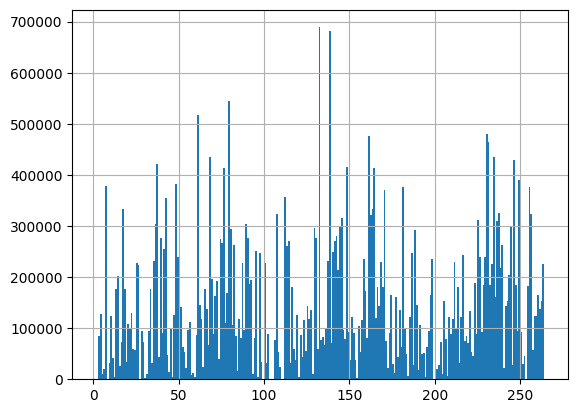

In [15]:
df["PULocationID"].hist(bins=264)

Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones

C:\Users\grzec\AppData\Local\Temp\ipykernel_14912\54599210.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(12, 8))


Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...
Wczytywanie mapy NYC Taxi Zones...
Tworzenie heatmapy...


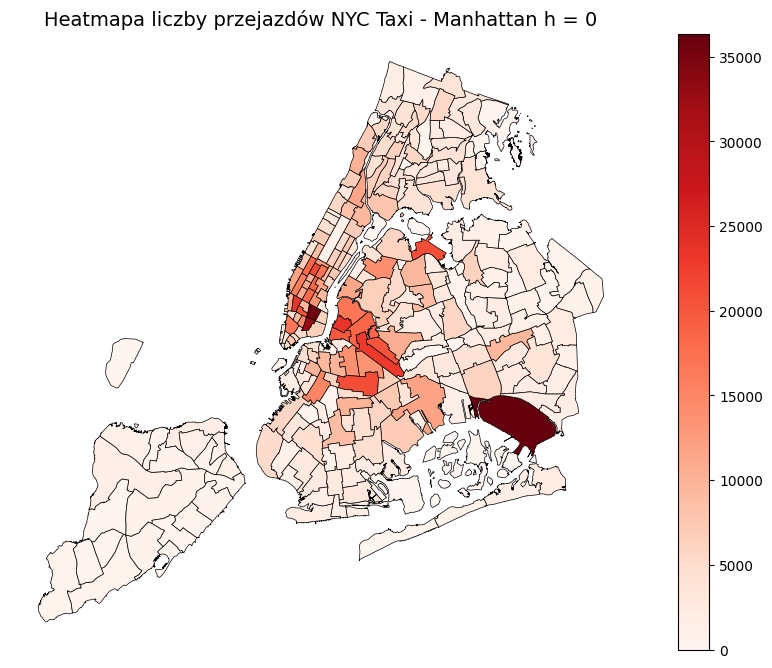

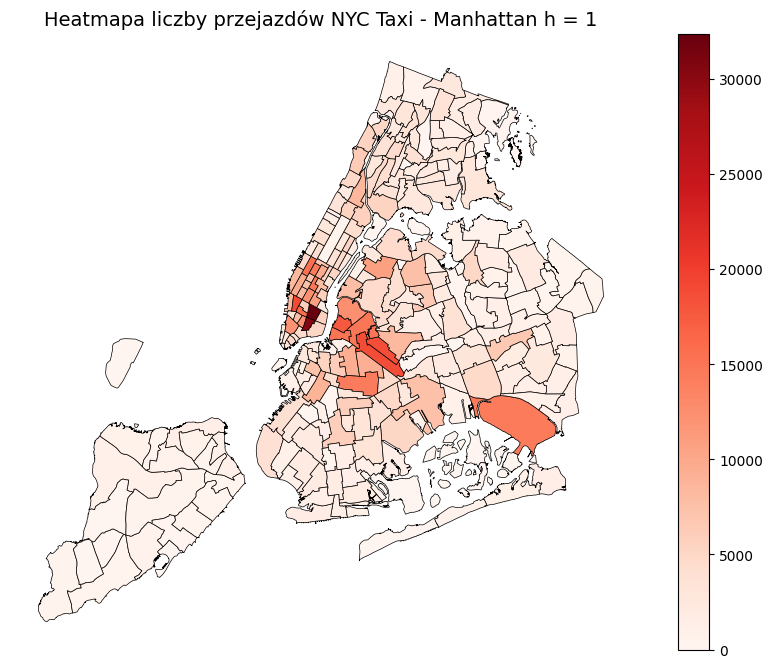

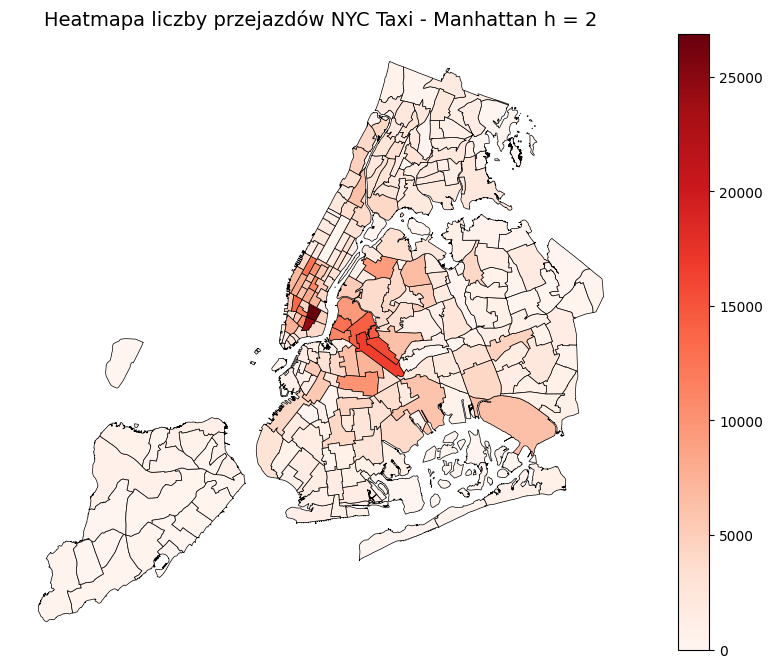

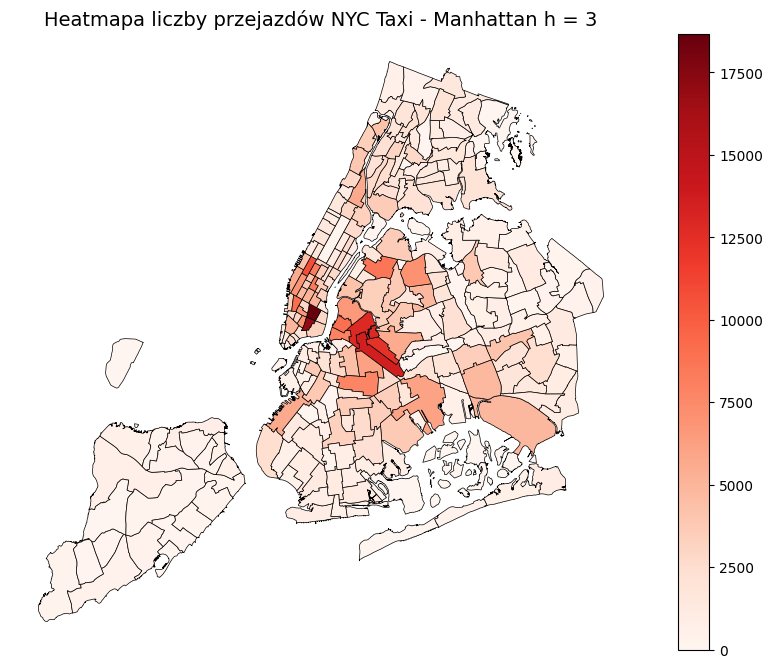

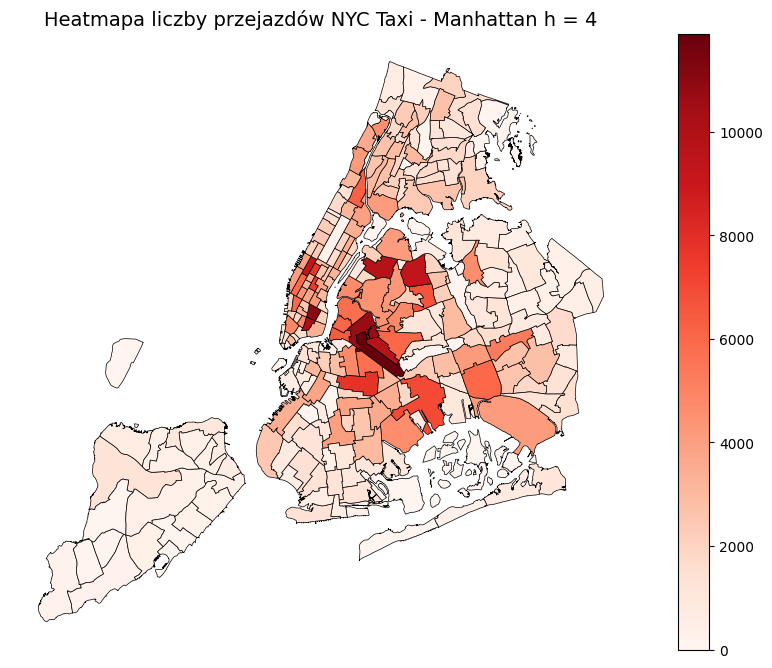

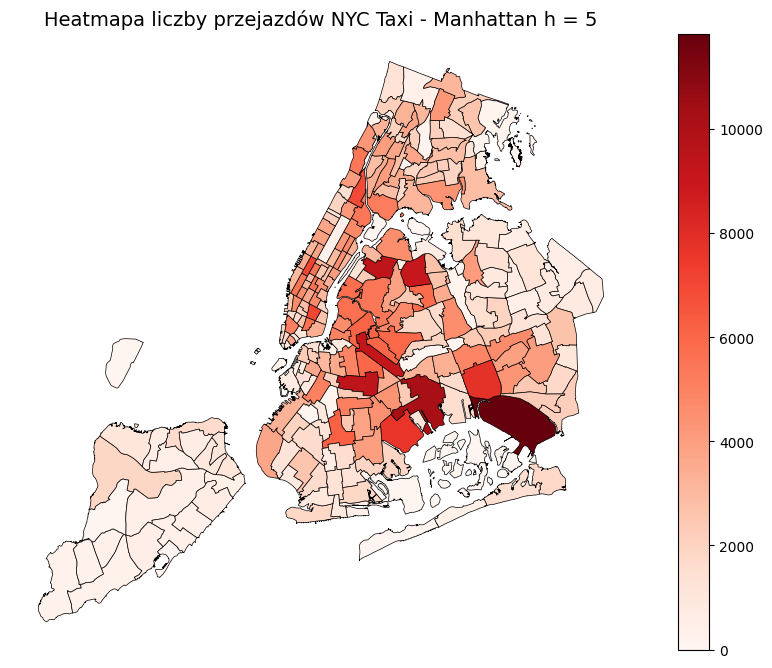

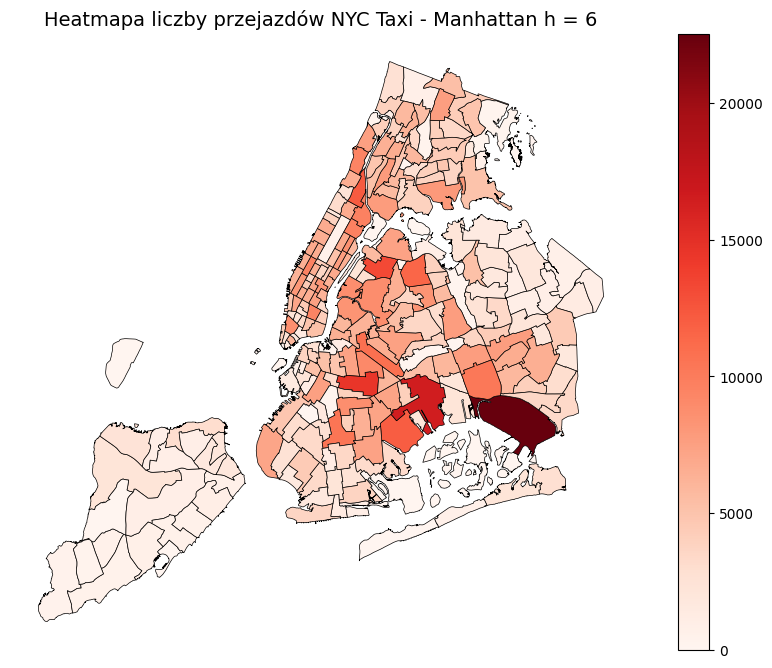

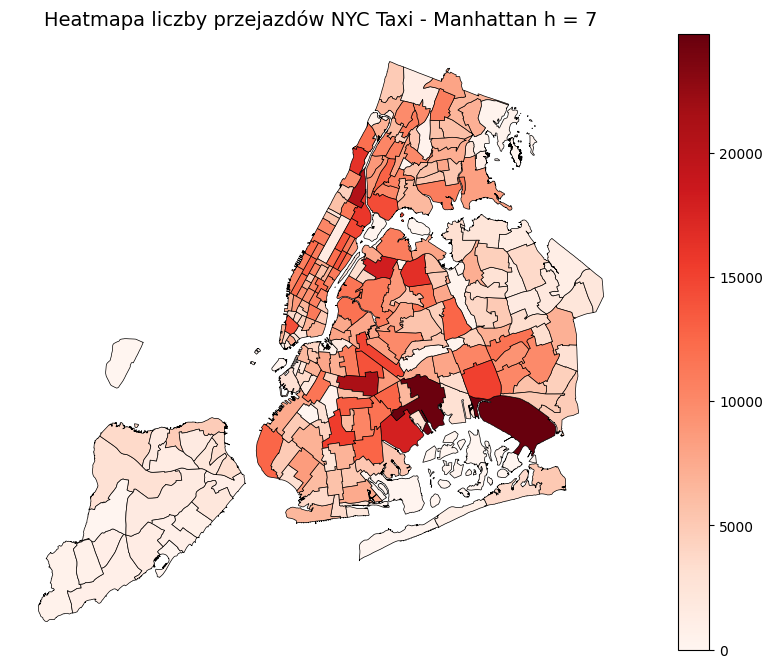

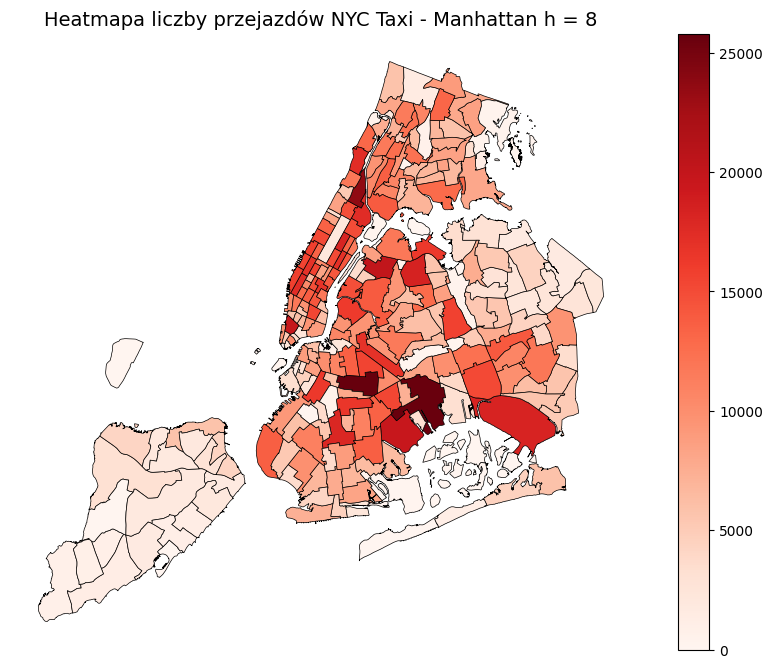

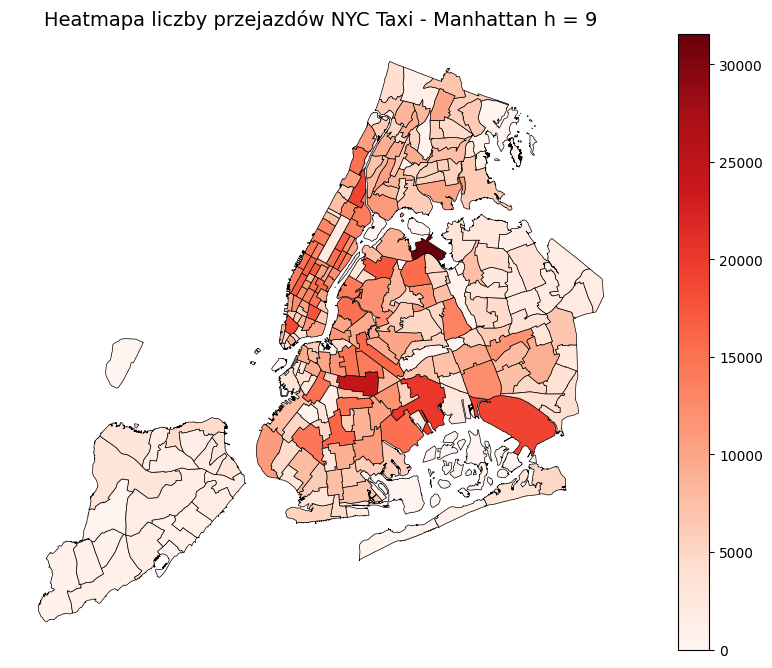

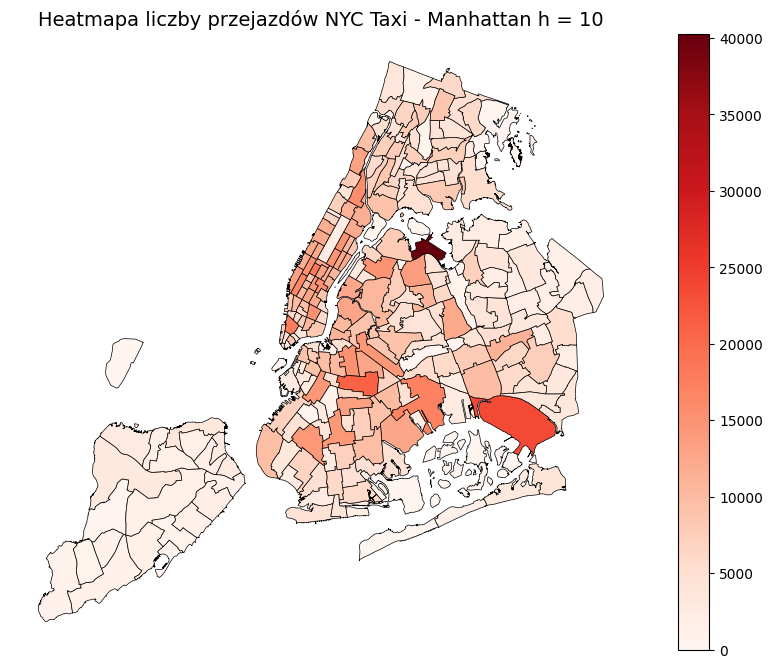

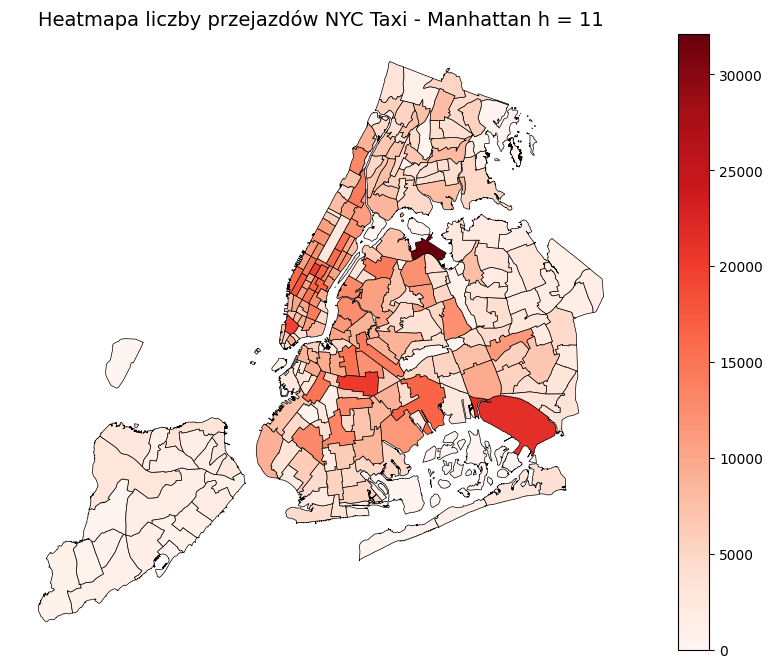

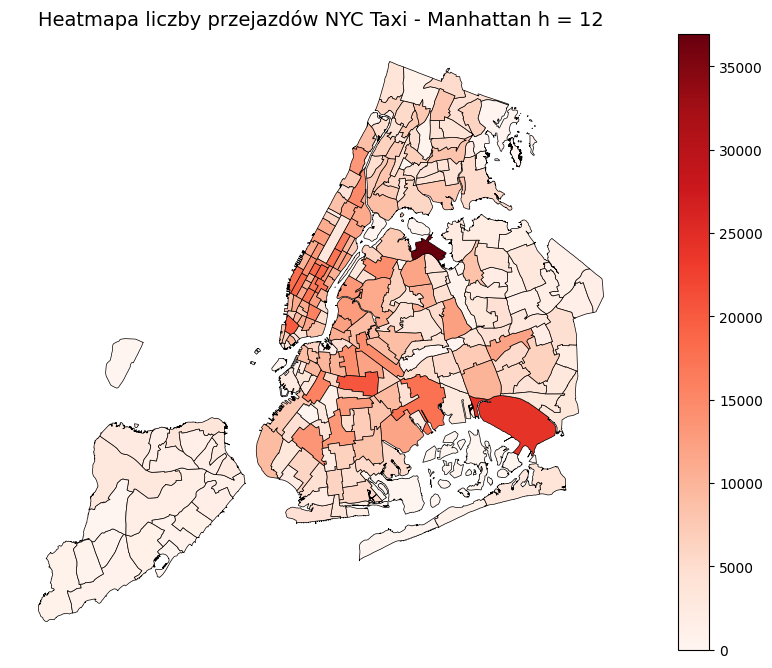

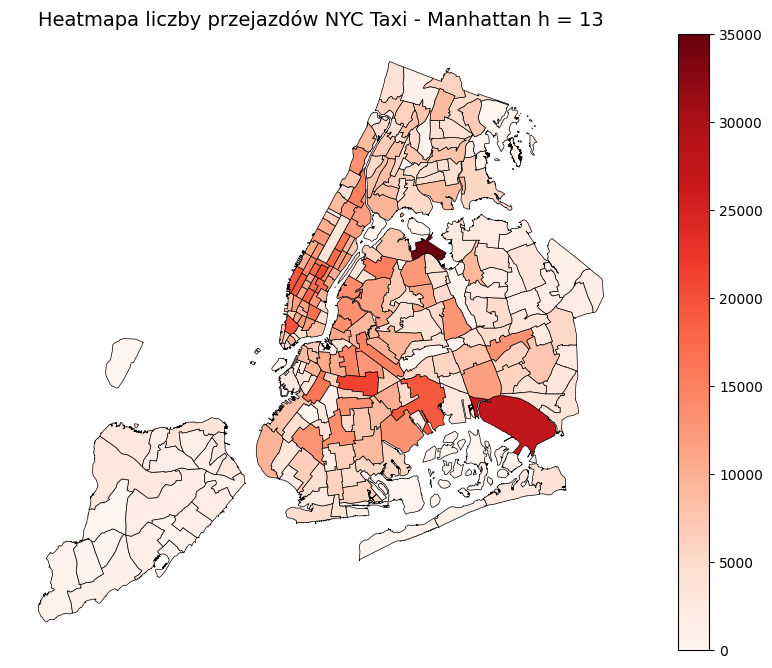

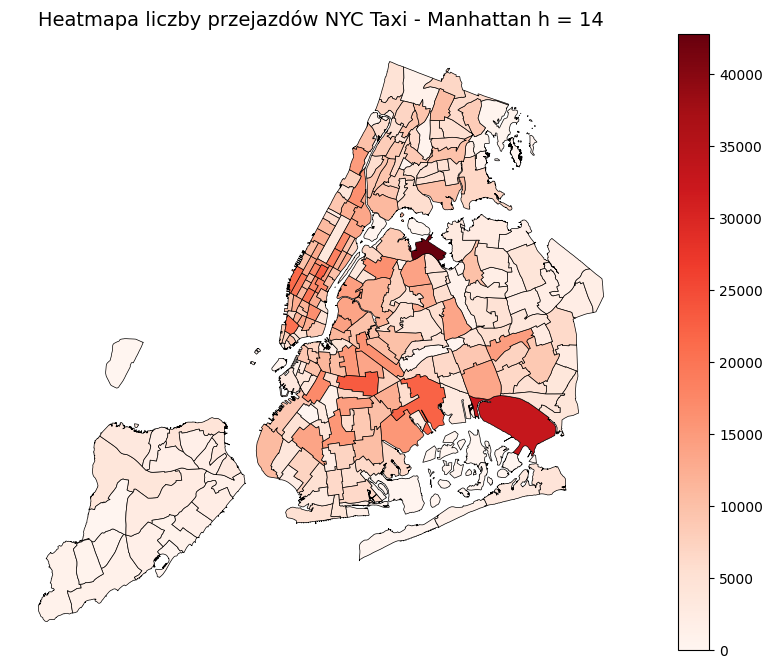

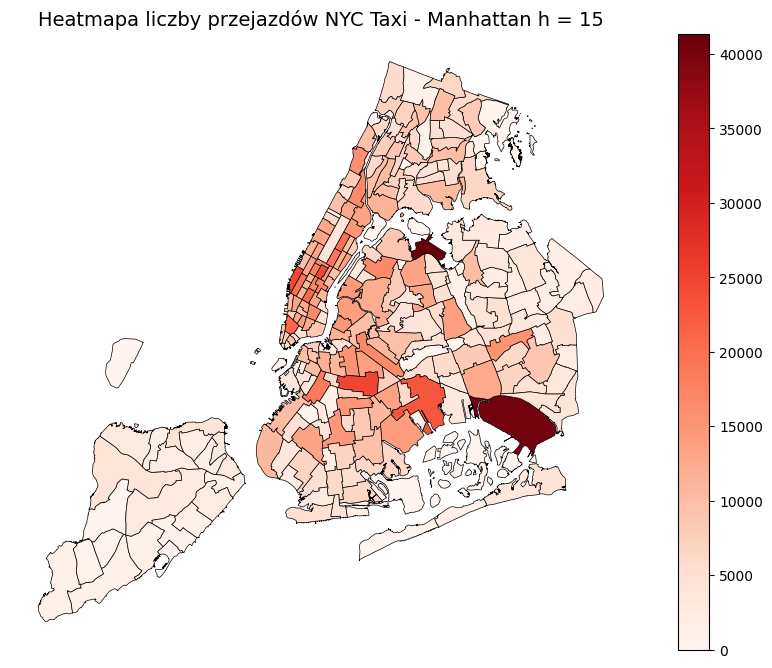

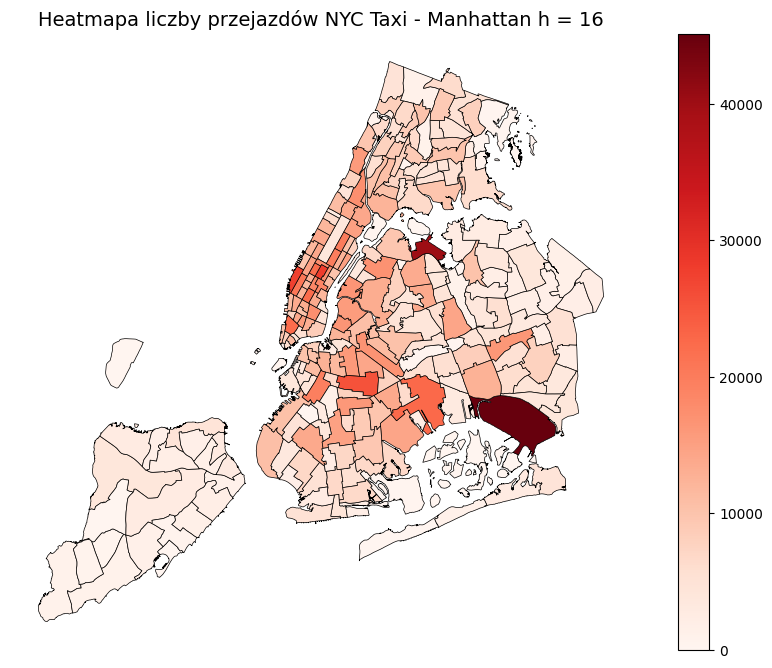

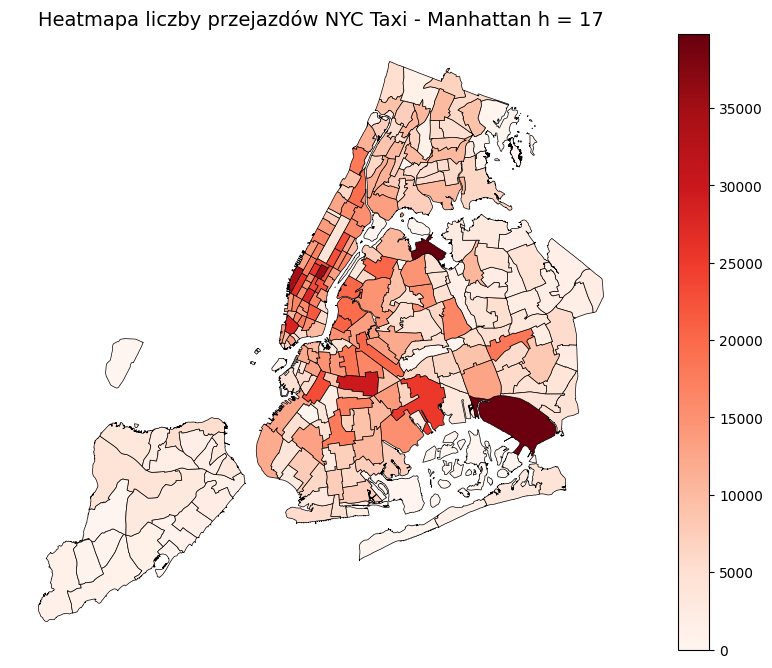

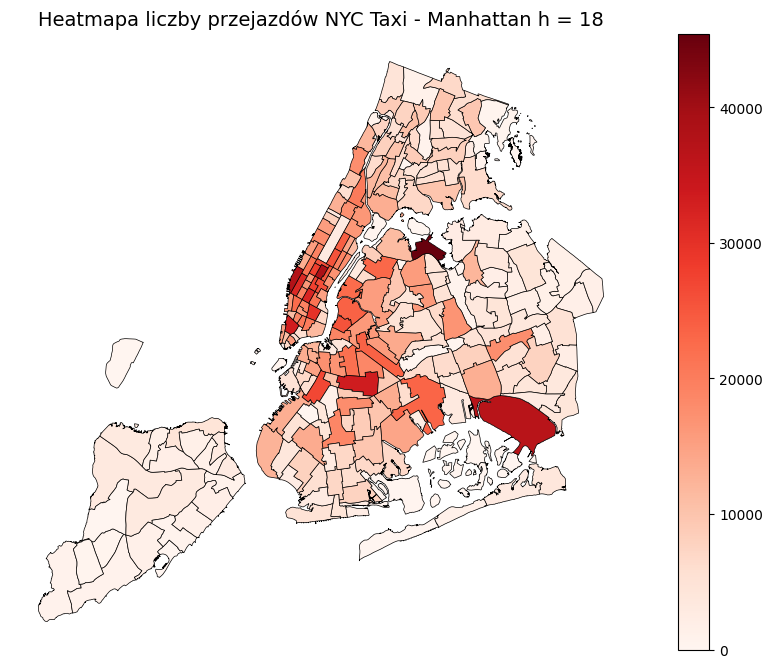

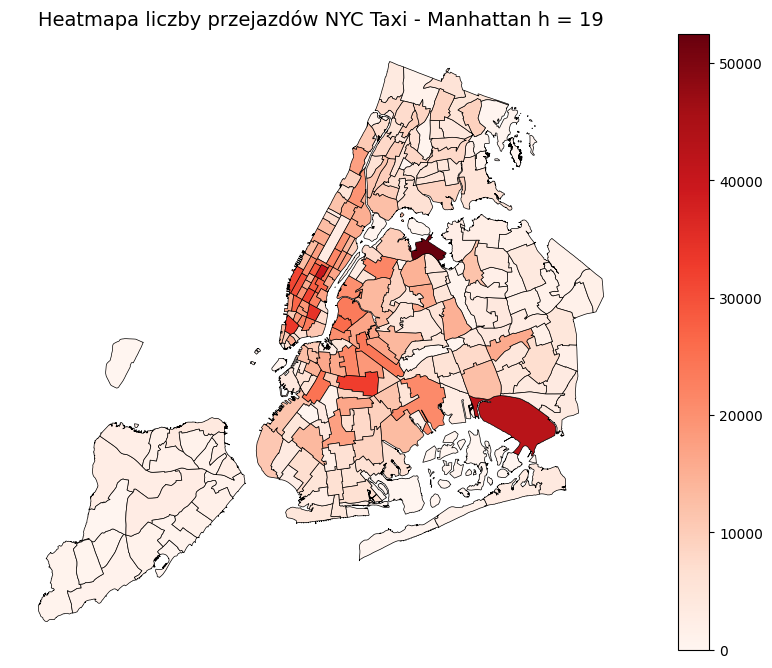

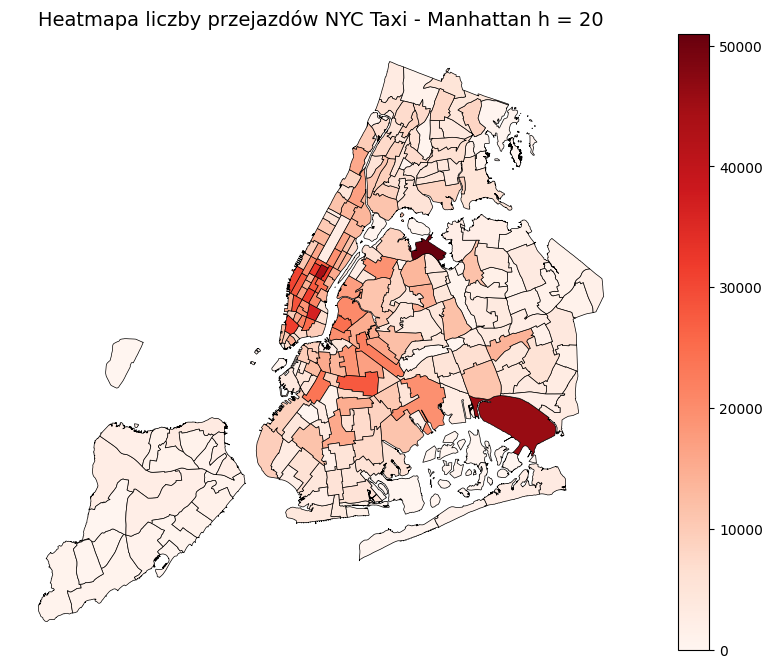

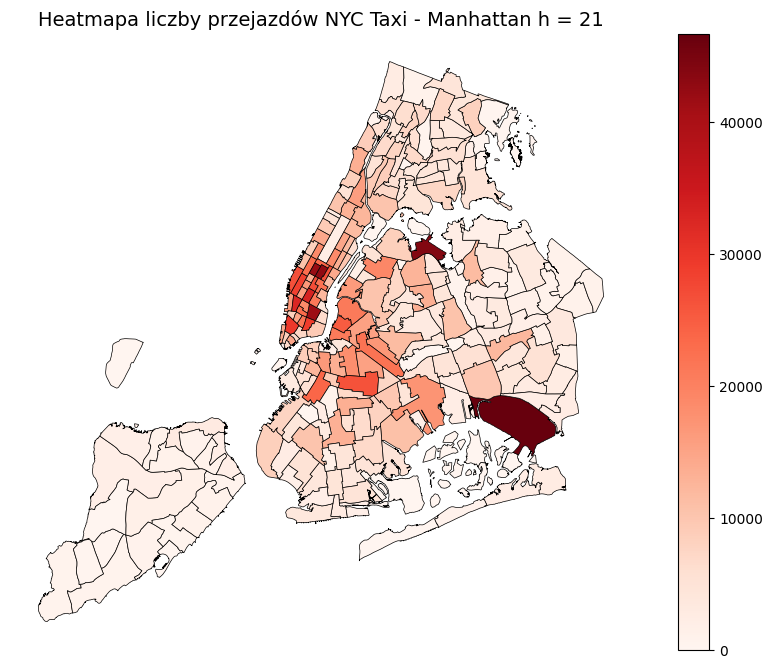

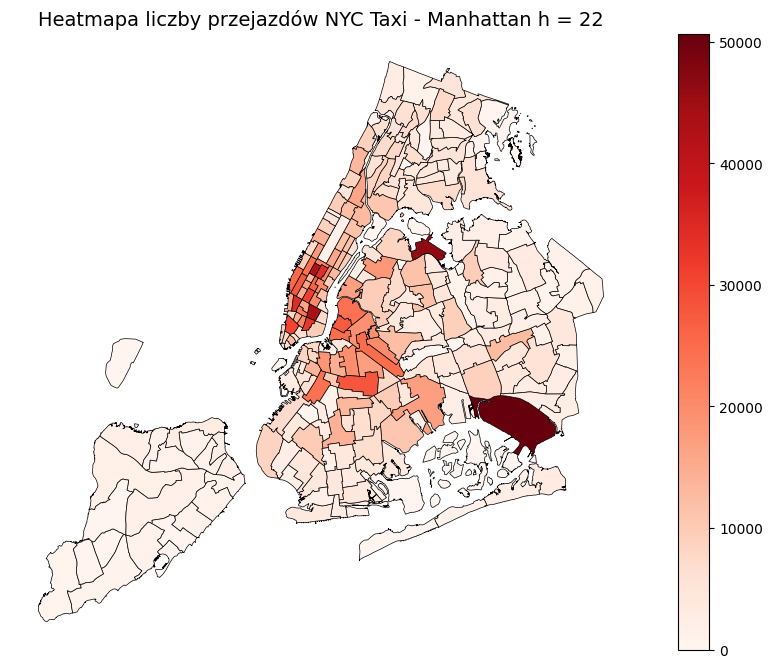

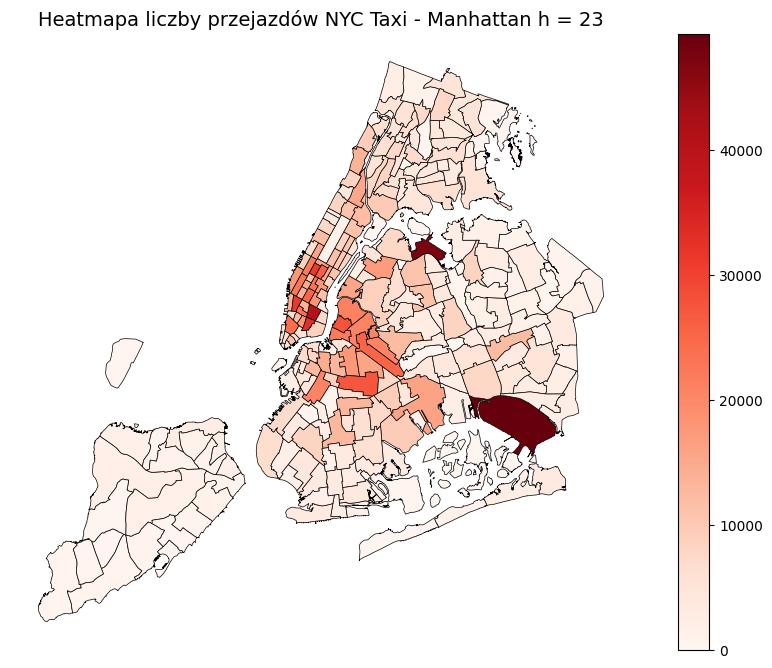

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

for i in range(24):
    
    filtered = df.query(f'hour == {i}')
    # Zliczanie przejazdów dla każdej strefy
    pickup_counts = filtered.groupby("PULocationID").size().reset_index(name="ride_count")

    # === 2. Wczytanie mapy NYC Taxi Zones ===
    print("Wczytywanie mapy NYC Taxi Zones...")
    zones = gpd.read_file("taxi_zones.shp")

    # Sprawdzenie zgodności kluczy
    zones["LocationID"] = zones["LocationID"].astype(int)

    # Połączenie liczby przejazdów z mapą
    zones = zones.merge(pickup_counts, left_on="LocationID", right_on="PULocationID", how="left")
    zones["ride_count"] = zones["ride_count"].fillna(0)  # Brakujące wartości → 0 kursów

    # === 3. Tworzenie heatmapy ===
    print("Tworzenie heatmapy...")
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Rysowanie mapy z kolorem oznaczającym liczbę kursów
    zones.plot(column="ride_count", cmap="Reds", linewidth=0.5, edgecolor="black", legend=True, ax=ax)

    # Dodanie tytułu
    plt.title(f"Heatmapa liczby przejazdów NYC Taxi - Manhattan h = {i}", fontsize=14)
    plt.axis("off")  # Ukrycie osi

    # Wyświetlenie mapy
    # plt.show()


    plt.savefig('hv_fhv_maps/map_hour_'+ str(i) + '.png')